In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv("diabetes.csv")

diabetes.shape

(768, 9)

<Axes: >

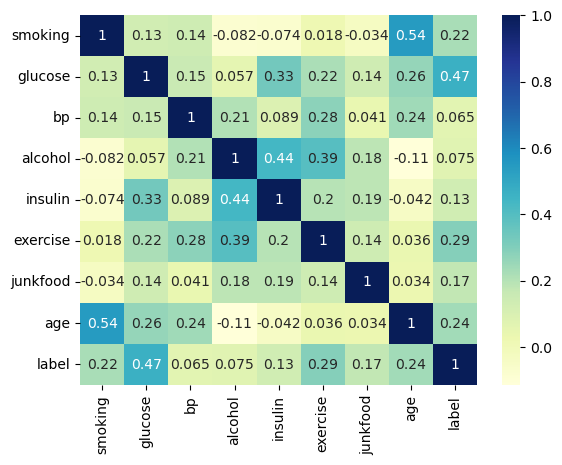

In [4]:
# Correlation matrix
corr=diabetes.corr()

# Plot Heatmap on correlation matrix 
sns.heatmap(corr, annot=True, cmap='YlGnBu')

Vemos que ninguna variable correlaciona en más de 0,7 por lo tengo no podríamos hacer una regresión lineal

In [5]:
feature_set = ['smoking', 'insulin', 'exercise', 'age','glucose','junkfood','alcohol']
features = diabetes[feature_set] 
target = diabetes.label

In [6]:
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=2)
 
# Train the model using the training dataset
knn.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions_knn = knn.predict(feature_test)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions_knn))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions_knn))
# Calculate model recall
print("Sensitivity/Recall:",recall_score(target_test, predictions_knn))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions_knn))

Accuracy: 0.70995670995671
Precision: 0.68
Sensitivity/Recall: 0.4
F1-Score: 0.5037037037037037


In [9]:
new_patient = {'smoking': [7, 0, 0, 0, 1], 
               'insulin': [135, 80, 140, 205, 39],
               'exercise': [26, 180, 350, 340, 52.3],
               'age': [50, 11, 13, 12, 51],
               'glucose': [138, 5, 53, 5, 35],
               'junkfood': [0.678, 0.460, 0, 0.460, 0.652],
               'alcohol': [26, 0, 0, 0, 39]
              }

In [10]:
new_patient_df = pd.DataFrame(new_patient, 
                              index = ['John', 'Arnau', 'Hussein', 'Pol', 'Didier'],
                              columns = ['smoking', 'insulin', 'exercise', 'age','glucose','junkfood','alcohol']
                             )
new_patient_df

,smoking,insulin,exercise,age,glucose,junkfood,alcohol
John,7,135,26.0,50,138,0.678,26
Arnau,0,80,180.0,11,5,0.460,0
Hussein,0,140,350.0,13,53,0.000,0
Pol,0,205,340.0,12,5,0.460,0
Didier,1,39,52.3,51,35,0.652,39


In [11]:
predictions_knn_new_patients = knn.predict(new_patient_df)
predictions_knn_new_patients

array([1, 0, 1, 0, 0])

In [13]:
new_patient = {'smoking': [7, 0, 0, 0, 1], 
               'insulin': [135, 80, 140, 205, 39],
               'exercise': [26, 180, 350, 340, 52.3],
               'age': [50, 11, 13, 12, 51],
               'glucose': [138, 5, 53, 5, 35],
               'junkfood': [0.678, 0.460, 0, 0.460, 0.652],
               'alcohol': [26, 0, 0, 0, 39],
               'diabetes':[1, 0, 1, 0, 0]
              }

In [18]:
new_patient_df = pd.DataFrame(new_patient, 
                              index = ['John', 'Arnau', 'Hussein', 'Pol', 'Didier'],
                              columns = ['smoking', 'insulin', 'exercise', 'age','glucose','junkfood','alcohol','diabetes']
                             )

In [19]:
new_patient_df

,smoking,insulin,exercise,age,glucose,junkfood,alcohol,diabetes
John,7,135,26.0,50,138,0.678,26,1
Arnau,0,80,180.0,11,5,0.460,0,0
Hussein,0,140,350.0,13,53,0.000,0,1
Pol,0,205,340.0,12,5,0.460,0,0
Didier,1,39,52.3,51,35,0.652,39,0


# SVM

Dentro del modo supervisado, sé dçonde tengo gatos y perros y con este modelo lo que quiero es la línea más optima que separe los gatos de los perros, que separe de la mejor manera los gatos de los perros. El punto más alejado de perros y el punto más alejado de gatos, selecciona la linea intermedia. Así cuando haya entrenado mi modelo y entre un nuevo sujeto se pordrá decidir si se trata de un gato y un perro.

In [20]:
from sklearn import svm
 
# Create a SVM classifier object
clf = svm.SVC(kernel='linear') 
## es una distancia euclediana . Podriamos elegir Gaussiano o polinómico.
 
# Train the model using the training sets
clf.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions_svm = clf.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions_svm))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions_svm))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions_svm))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions_svm))

Accuracy: 0.7878787878787878
Precision: 0.7903225806451613
Recall: 0.5764705882352941
F1-Score: 0.6666666666666666


In [25]:
new_patient_df_svm = pd.DataFrame(new_patient, 
                              index = ['John', 'Arnau', 'Hussein', 'Pol', 'Didier'],
                              columns = ['smoking', 'insulin', 'exercise', 'age','glucose','junkfood','alcohol']
                             )
new_patient_df_svm

,smoking,insulin,exercise,age,glucose,junkfood,alcohol
John,7,135,26.0,50,138,0.678,26
Arnau,0,80,180.0,11,5,0.460,0
Hussein,0,140,350.0,13,53,0.000,0
Pol,0,205,340.0,12,5,0.460,0
Didier,1,39,52.3,51,35,0.652,39


In [26]:
predictions_svm_new_patients = clf.predict(new_patient_df_svm)
predictions_svm_new_patients

array([0, 1, 1, 1, 0])

# Logistic Regresión

Trasforma un problema continuo en un problema categórico

In [27]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs',  max_iter=500000)
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions_LR = logreg.predict(feature_test)

# Get prediction probability 
predictions_prob = logreg.predict_proba(feature_test)[::,1]

#Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions_LR))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions_LR))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions_LR))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions_LR))

Accuracy: 0.7792207792207793
Precision: 0.765625
Recall: 0.5764705882352941
F1-Score: 0.6577181208053692


In [28]:
print(predictions_prob)

[0.4142342  0.31262014 0.1342548  0.06196923 0.23779748 0.27528878
 0.37343715 0.09713168 0.15993052 0.19334604 0.48074318 0.08566224
 0.98009222 0.70461067 0.031169   0.76336972 0.23723138 0.32345985
 0.05861294 0.13168343 0.38241887 0.14936698 0.93877906 0.24953915
 0.07196709 0.44512868 0.23626669 0.76549213 0.11515589 0.50294668
 0.47651455 0.15347638 0.06203998 0.73894328 0.13766319 0.66028753
 0.08413183 0.19810647 0.111229   0.56003403 0.21389246 0.08921028
 0.04375431 0.37665069 0.07786349 0.02424108 0.71787473 0.8097491
 0.07449352 0.14449175 0.0041613  0.18498763 0.82191121 0.05149159
 0.74289338 0.12190682 0.38122263 0.30347385 0.50547088 0.14062332
 0.63707791 0.00644073 0.66142434 0.23103846 0.40028225 0.1062283
 0.01687171 0.36211645 0.71500175 0.63056849 0.85731908 0.75100769
 0.60090558 0.01651847 0.68105456 0.28936445 0.68249126 0.35910427
 0.1222736  0.68721909 0.7724891  0.23020399 0.44949039 0.30548439
 0.26676412 0.78083832 0.53643482 0.28991552 0.3957254  0.261875

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

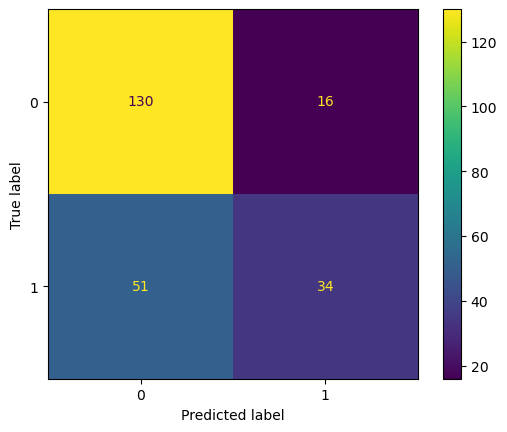

In [31]:
cm = confusion_matrix(target_test, predictions_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

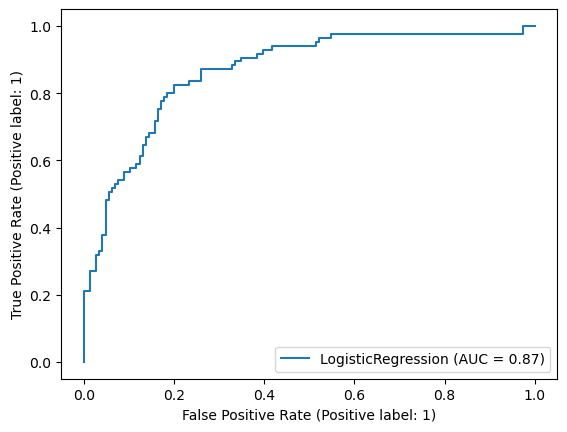

In [32]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg,feature_test, target_test)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.865914585012087


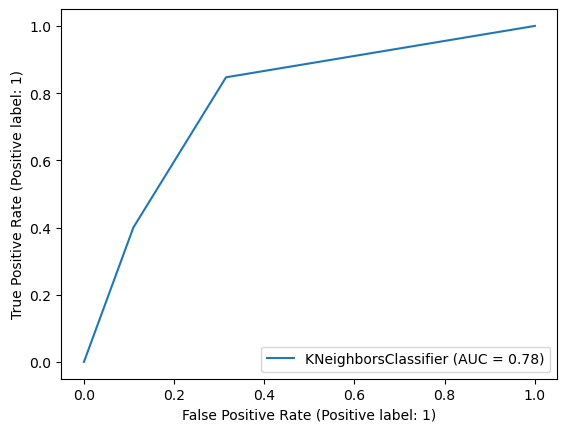

In [34]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(knn,feature_test, target_test)
plt.show()